<a href="https://colab.research.google.com/github/dinggga/super-broccoli/blob/main/220530hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념정리]**


## **01. 딥러닝 준비**

### **1-1 주요 용어**

**1-1-1 하이퍼파라미터(hyper-parameter)**

: 머신러닝 모델 훈련할 때 사용자가 직접 설정해주는 설정값. (자동 업데이트 조정되는 가중치weights, 편향bias 외의 값들)

**1-1-2 과소적합 vs 과대적합 (underfitting vs overfitting)**
- 훈련용 데이터(training/train set), 예측용 데이터(test set, 정답 레이블label이 없는 데이터)
- 예측 데이터가 학습 데이터와 다른 분포를 갖거나, 학습 데이터가 특정 레이블에 편향되어 있다면 예측 성능이 현저히 떨어지게 됨.
- 과소적합: 모델이 충분히 학습되지 않은 경우
- 과대적합: 학습 데이터를 지나치게 반복 학습한 경우. 훈련 데이터의 불필요한 노이즈까지 과도하게 모델에 반영.
- -> 해결 방안: 불필요한 노이즈를 데이터분석 및 전처리로 해소 / 훈련 데이터의 일부를 검증 데이터로 활용

**1-1-3 에포크(epoch)**

: 딥러닝 모델이 반복(iteration) 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop). 과소/과대적합을 막는 중요 하이퍼파라미터

**1-1-4 손실함수(loss function)**

: 예측값과 정답값의 차이 또는 오차(error). 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적. 사용자가 정의.
- 지도학습supervied learning
  - 이진분류binary: binary_crossentropy 손실함수 사용 (출력층의 활성화 함수가 'sigmoid'인 경우)
  - 다중분류multi-class: 
    - categorical_crossentropy 손실함수 사용 (다중분류의 대상이 되는 클래스가 원핫 벡터인 경우)
    - sparse_categorical_crossentropy 손실함수 사용 (정답 클래스가 레이블값인 서로 다른 숫자로 구분된 경우)
  - 출력층의 활성함수로 'softmax' 사용
- 회귀 모델: 평균제곱오차(MSE), 평균절대값오차(MAE), 후버(Huber) 등 사용
- 손실함수 목록 교재 참고
- 딥러닝 문제에 따라 사용자가 직접 손실함수 만들어 사용하기도 함.



1-1-5 경사하강법(gradient descent)

: 모델 내부의 가중치weight에 대한 미분값을 구하고 목적함수값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법

1. 손실함수/목적함수를 정의
2. 샘플데이터셋 생성하는 함수 정의, 임의의 w와 b값 가정, 약간의 노이즈 추가 > y값 생성 
3. 단순선형회귀 수식이 주어졌을 때 손실함수를 최소로 하는 w와 b를 경사하강법으로 구함. w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감.


### **1-2 딥러닝 프로세스**
필수 프로세스: 데이터전처리, 모델 생성, 컴파일, 훈련

**1-2-1 데이터 전처리**

: 배열 차원 변경 / 스케일 조정 등

**1-2-2 모델 생성**

: Sequential API(순차적 구조의 모델), Funtional API 혹은 Model Subclassing(다중입력 및 출력을 가지는 복잡한 구조의 모델)

**1-2-3 모델 컴파일**

: 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의. 모델 인스턴스에 compile() 메소드 적용하고 여러 속성값 설정

**1-2-4 모델 훈련**

: fit() 함수에 매개변수(파라미터) 전달 (훈련데이터셋, 검증데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등)

**1-2-5 모델 검증**

: 예측값과 정답 비교하여 평가지표 계산, 모델의 성능평가.

**1-2-6 모델 예측**

## **02. 단순 신경망 훈련**

### **2-1. 선형회귀**

- 단순선형회귀simple linear regression
  - X: 독립변수, Y: 종속변수, w: 가중치weight, b: 편향bias
  - y = w*x + b

### **2-2. 뉴런**
- 뉴런: 인공 신경망 모델 구성하는 하나의 신경. 노드(node)
- 신경망: 여러개의 레이어layer, 1개의 레이어는 한개 이상의 뉴런으로 구성됨
- 뉴런 내부에 가중치 존재, 모델 훈련에서 오차 역전파 통해 뉴런 가중치 업데이트
- 역전파: 그래디언트 계산하는 방법. 출력층 > 입력층 순으로 역으로 계산하고 저장.

### **2-3. Dense 레이어**
- 심층 신경망 모델 구성하는 가장 기본 레이어. 완전 연결층
- 입력input 층 > 은닉hidden 층 > 출력output 층
- 텐서플로의 layer 모듈에서 dense 레이어 구현, 노드 개수와 활성화 함수지정 가능





### **2-5. Sequential API**
- 시퀀스에 맞게 일렬로 연결하는 방식. 
- 직관적으로 구조 이해 가능해 간단
- 2개 이상의 다중입력이나 다중출력 갖는 복잡한 구조는 만둘 수 없음

**2-5-1 모델 구조**
- 리스트형 / add 함수로 여러 개의 층 입력. 레이어 개수 제한 없음.

**2-5-2 입력 데이터 형태**
- 첫번째 층은 input_shape 매개변수 지정해야 함. (투플/리스트로 지정)

**2-5-3 단순선형회귀 모델 정의**
- 1개의 뉴런 가지는 Dense 레이어 한 개 사용. 뉴런은 w와 b를 매개변수로 가짐.
- user_bias=False로 지정하면 상수항 b 포함하지 않음


### **2-6 모델 요약**
: model.summary()

### **2-7 컴파일**
- 옵티마이저, 손실함수, 평가지표 지정 방법: 클래스 인스턴스, 함수, 사전 정의된 문자열
- 클래스 인스턴스: 하이퍼파라미터 사용자가 직접 지정 가능 / 문자열 지정: 하이퍼파라미터 기본값 사용, 수정 어려움

### **2-8 훈련**
- fit() 메소드 적용해 데이터 입력하고 모델 훈련(가중치 텐서 업데이트하는 과정)
- 훈련용 데이터셋 x, 정답 y, 반복훈련할 epoch 수 지정
- verbose=0 : 훈련 중간 과정 출력 X

### **2-9 검증**
: evaluate() 메소드에 x,y 대입하여 모델 성능 검증

### **2-10 예측**
preict() 메소드에 새로운 입력 데이터 넣어 예측값 얻음.


## **03. 심층신경망으로 이미지 분류**

### **3-1 케라스 내장 데이터셋 로드**
load_data() 메소드

### **3-2 데이터 전처리**
정규화 통해 데이터 범위 조절

### **3-3 Flatten 레이어**
Dense 레이어에는 반드시 1차원 배열 입력해야 하므로 전처리 필요. Flatten 레이어 사용 가능.

### **3-4 활성화 함수**
- 입력을 비선형 출력으로 변환해주는 함수
- 시그모이드(Sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent/tanh), ReLU(Rectified Unit), Leaky ReLU 등
- activation 매개변수에 활성화함수 문자열 대입
- 별도의 층으로도 적용 가능 (Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용됨. 레이어 구성을 조금 더 커스터마이징하고 싶을 때)

### **3-5 입력과 출력**
- 레이어: 입력층(input_shape) > ... > 출력층
- 출력층 노드 개수는 반드시 분류 클래스 개수와 동일해야 함.
- 출력층 노드가 2개 이상인 경우 softmax 활성화함수 적용.(다중분류) / 이진분류는 출력층 노드 개수 1개, sigmoid 함수 적용.

### **3-6 손실함수**
- 출력층에 따라 올바른 손실함수 설정해야 함
- 이진분류기: 출력층 노드 개수 1개이면 activation='sigmoid', 손실함수는 binary_crossentropy
- 출력층 노드 개수 2개 이상 경우
  - 출력데이터가 원핫벡터: categorical_crossentropy
  - 원핫벡터 아닌 경우: sparse_categorical_crossentropy

### **3-7 옵티마이저**
- 손실 낮추기 위해서 신경망 속성(가중치, 학습류 등)을 변경하는 데 사용되는 최적화 방법. Adam, SGD, Adagrad 등
- 클래스 인스턴트나 문자열로 지정 가능

### **3-8 평가지표**
- 정확도(accuracy/acc), auc, precision, recall 등
- 인스턴트나 문자열로 지정 가능

### **3-9 훈련**
- 검증셋 지정: validation_data 매개변수에 투플 형식의 검증셋 지정

### **3-10 평가**
evaluate() 메소드로 모델 성능 검증

### **3-11 예측**
predict() 메소드. 

## **04. 모델 세부 설정**

### **4-1 초기값 설정**
- Dense 레이어 기본 초기화 방법: Glorot Uniform
- 변경 방법: kernel_initializer 매개변수 설정. 클래스 인스턴트, 문자열 지정 방법.

### **4-2  규제**
- 과대적합 해소 위해 L1, L2 규제 적용. 기본값으로 규제 적용 안하기 때문에(kernel_regularizer=None) 별도 설정 필요.

### **4-3 드롭아웃**
- 과대적합 문제 해결에 상당한 효과.
- 노드 일부 신호를 임의로 삭제하여 가중치 파라미터 개수 감소.

### **4-4 배치 정규화**
- 각 층에서 활성화함수 통과하기 전 미니배치 스케일을 정규화.


---
---
# **[필사]**

**1-1 주요 용어**

1-1-4 손실함수

In [3]:
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

#함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy>

1-1-5 경사하강법

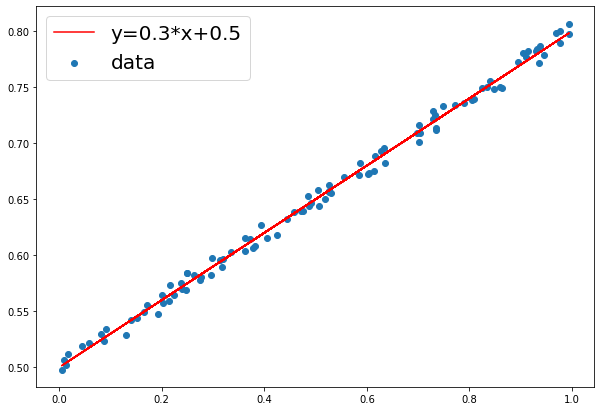

w:0.3, b:0.5


In [4]:
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [6]:
#최대 반복 횟수
num_epoch = 1000

#학습률
learning_rate = 0.005

#에러 기록
errors = []

#random한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  #Hypothesis 정의
  y_hat = w*x + b

  #Loss Function 정의
  error = 0.5 * ((y_hat-y) ** 2).sum()
  if error < 0.005:
    break
  #Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print('{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}'.format(epoch, w, b, error))

print('----' * 15)
print('{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}'.format(epoch, w, b, error))

 0 w = 0.64194, b = 0.49905 error = 13.38871
 5 w = 0.52450, b = 0.37862 error = 0.22572
10 w = 0.49024, b = 0.39620 error = 0.16283
15 w = 0.46155, b = 0.41187 error = 0.11784
20 w = 0.43719, b = 0.42517 error = 0.08541
25 w = 0.41651, b = 0.43647 error = 0.06203
30 w = 0.39895, b = 0.44606 error = 0.04517
35 w = 0.38404, b = 0.45420 error = 0.03302
40 w = 0.37139, b = 0.46111 error = 0.02426
45 w = 0.36064, b = 0.46699 error = 0.01795
50 w = 0.35151, b = 0.47197 error = 0.01339
55 w = 0.34376, b = 0.47620 error = 0.01011
60 w = 0.33718, b = 0.47980 error = 0.00775
65 w = 0.33160, b = 0.48285 error = 0.00604
------------------------------------------------------------
70 w = 0.3, b = 0.5 error = 0.00481


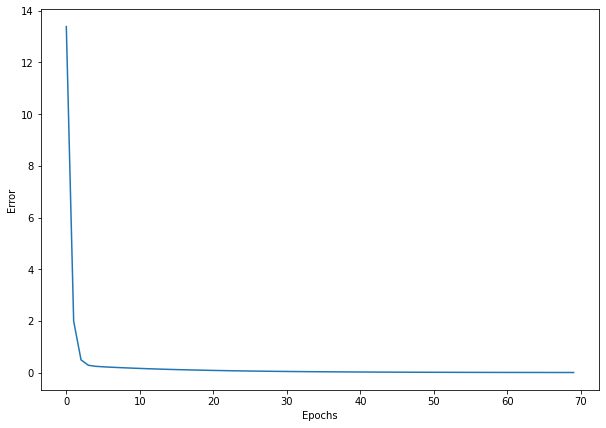

In [7]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

**02. 단순 신경망 훈련**

2-3. Dense 레이어

In [8]:
import tensorflow as tf

#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

2-4 데이터셋 만들기

In [9]:
#샘플 데이터셋 생성
x = np.arange(1,6)

#y=3x+2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


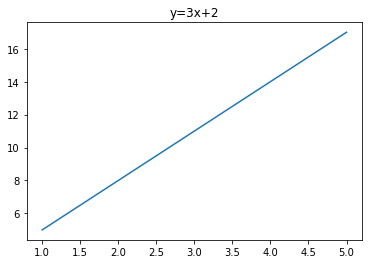

In [10]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

2-5-1 모델 구조

In [11]:
import tensorflow as tf

#리스트형
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1),
])

In [12]:
#add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2-5-3 단순선형회귀 모델 정의

In [13]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

2-6 모델 요약

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2-7 컴파일

In [16]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [17]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

2-8 훈련

In [18]:
#훈련
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 928ms/step - loss: 156.8771 - mae: 11.6667
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 91.4992 - mae: 8.9467
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 53.3997 - mae: 6.8701
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 31.1967 - mae: 5.2848
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 18.2574 - mae: 4.0745


In [19]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 481ms/step - loss: 176.4404 - mae: 12.3539
Epoch 2/1200
1/1 [==============================] - 0s 13ms/step - loss: 102.8910 - mae: 9.4689
Epoch 3/1200
1/1 [==============================] - 0s 6ms/step - loss: 60.0295 - mae: 7.2665
Epoch 4/1200
1/1 [==============================] - 0s 6ms/step - loss: 35.0516 - mae: 5.5851
Epoch 5/1200
1/1 [==============================] - 0s 6ms/step - loss: 20.4952 - mae: 4.3014
Epoch 6/1200
1/1 [==============================] - 0s 16ms/step - loss: 12.0119 - mae: 3.3213
Epoch 7/1200
1/1 [==============================] - 0s 14ms/step - loss: 7.0679 - mae: 2.5730
Epoch 8/1200
1/1 [==============================] - 0s 17ms/step - loss: 4.1863 - mae: 2.0017
Epoch 9/1200
1/1 [==============================] - 0s 15ms/step - loss: 2.5065 - mae: 1.5654
Epoch 10/1200
1/1 [==============================] - 0s 23ms/step - loss: 1.5272 - mae: 1.2322
Epoch 11/1200
1/1 [==============================] -

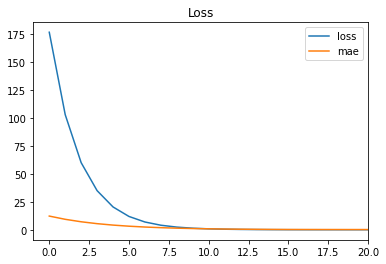

In [20]:
import matplotlib.pyplot as plt

#20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [21]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 0s 213ms/step - loss: 5.0513e-05 - mae: 0.0061


[5.051285188528709e-05, 0.006100273225456476]

In [23]:
# 예측
model.predict([10])

array([[32.029484]], dtype=float32)

**03. 심층신경망으로 이미지 분류**

3-1 케라스 내장 데이터셋 로드

In [24]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


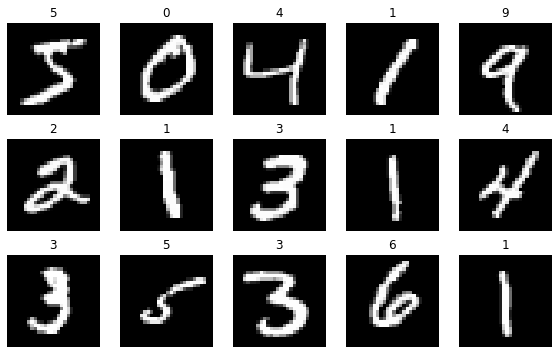

In [25]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

3-2 데이터 전처리

In [26]:
#x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [27]:
# 픽셀 값의 최소/최댓값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [29]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

3-3 flatten 레이어

In [32]:
print(f'변경 전 shape:{x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

# Flatten 레이어 사용
print(f'변경 전 shape: {x_train.shape}')
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)
변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


3-4 활성화 함수

In [33]:
# Dense 레이어에 relu 활성화 함수 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [34]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128),
                             tf.keras.layers.Activation('relu')
])

3-5 입력과 출력

In [35]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             #노드=10개(클래스 개수와 동일)
                             tf.keras.layers.Dense(10, activation='relu'),
])

In [37]:
#출력층 노드=1인 경우 -> sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

#출력층 노드=2개 이상인 경우 -> softmax
tf.keras.layers.Dense(10, activation='softmax')

3-6 손실함수


In [38]:
# 이진분류(출력노드개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [39]:
#y가 원핫벡터인 경우
model.compile(loss='categorical_crossentropy')
#y가 원핫벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

3-7 옵티마이저


In [40]:
#클래스 인스턴트로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3-8 평가지표

In [41]:
#클래스 인스턴트로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[acc])

#문자열로 지정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

3-9 훈련

In [42]:
model.fit(x_train, y_train,
          #검증셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3359 - accuracy: 0.1119 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 2.3025 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 2.3025 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3025 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3025 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3124 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3024 - accuracy: 0.0988 - val_loss: 2.3026 - val_accura

3-10 평가

In [43]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0980
검증셋 정확도: 0.09799999743700027


3-11 예측

In [44]:
# 예측
predictions = model.predict(x_test)

# 예측 결과 출력
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)